# Early Data Visualization

In this notebook we will look at the distribution of posts lengths by subreddit and the average post length by subreddut. This will all be done before doing any normalization or transformation of the text data.

In [1]:
# Imports
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

In [2]:
# Loading in the data
df = pd.read_csv('data/final_reddit_posts.csv')

To compute post length we will combine the 'title' and 'body' column.

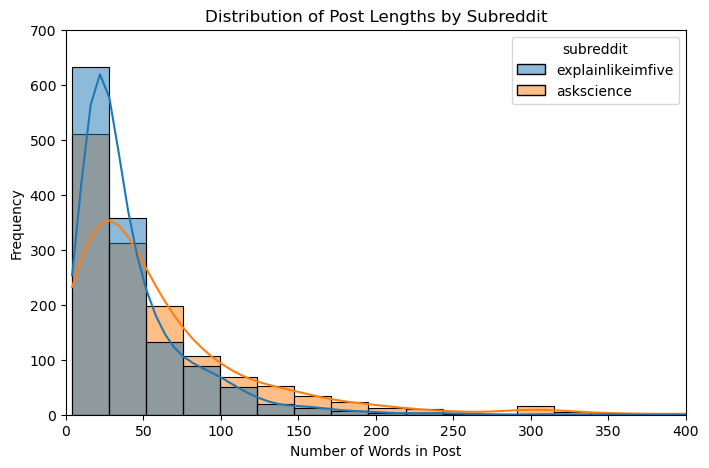

In [24]:
# Combining the title and body text
df['combined_text'] = df['title'] + ' ' + df['body'].fillna('')

# Computing text length
df['text_length'] = df['combined_text'].apply(lambda x: len(x.split()))

# Plotting the distribution
plt.figure(figsize=(8,5))
sns.histplot(df, x='text_length', hue='subreddit', bins=50, kde=True)
plt.title("Distribution of Post Lengths by Subreddit")
plt.xlabel("Number of Words in Post")
plt.ylabel("Frequency")
plt.xlim(0, 400)
plt.ylim(0, 700)
plt.show()

It seems that the there is a higher frequency of explainlikeimfive posts below 50 words. That sub reddit must not have to elaborate their question too much and probibly get their question accross using just the title field.

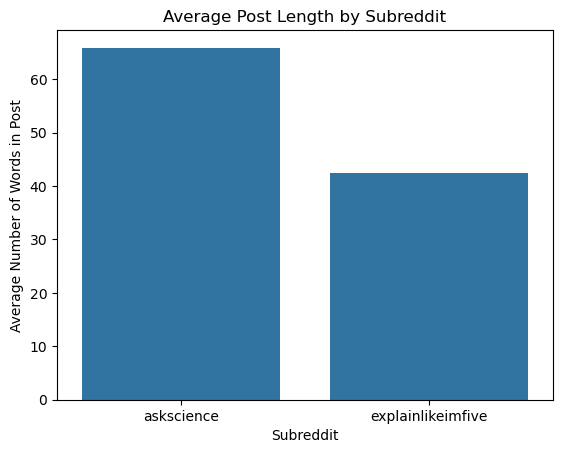

In [4]:
# Computing the average text length per subreddit
avg_text_length = df.groupby('subreddit')['text_length'].mean().reset_index()

# Plotting the bar chart
sns.barplot(data=avg_text_length, x='subreddit', y='text_length')
plt.title("Average Post Length by Subreddit")
plt.xlabel("Subreddit")
plt.ylabel("Average Number of Words in Post")
plt.show()

r/askscience averages more words per post than r/explainlikeimfive. In the next notebook we will normalize our text data.